In [1]:
import time
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import csv
from scipy.spatial.distance import cdist
from opencage.geocoder import OpenCageGeocode
from tqdm.notebook import tqdm
import urllib, json, requests
from functools import reduce

In [2]:
# store start time to get execution time of entire script
start_time = time.time()

## Clean Data

In [3]:
# read in patient data

df = pd.read_csv('TX_ENGAGEMENT_IMP.csv', index_col=[0])
print(df.shape)
df.head()

(23961, 107)


,female,nonwhite,unemplmt,primsev,Raceg4,B2a_0,State,City,zipcode,noins,prsatx,tottxp4,TRI_0,TRIg_0,TMI_0,TMIg_0,SES_0,SESg_0,RFQ33c,PMS20,PMS20g,phpi18,phpig,GVS,gvsg,tsd_0,und15,CWSg_0,srprobg,S9y10,dldiag,press,DSS9_0,dssg_0,epsg_0,adhdg_0,cdsg_0,suicprbs_0,cjsig_0,lrig_0,srig_0,homeless_0,HsgStress_0,S6,PSSI_0,pssig_0,OSSI_0,ossig_0,SSEI_0,SSEIg_0,GSSI_0,gssig_0,SSSI_0,sssig_0,GSI_0,gsig_0,GCS_0,gcsg_0,rerig_0,ncar,LRI7_0,SRI7_0,loc,txtypeg,ada_0,engage30,engage42,init,female_cd,nonwhite_cd,unemplmt_cd,primsev_cd,Raceg4_cd,prsatx_cd,TRI_0_cd,TRIg_0_cd,TMI_0_cd,TMIg_0_cd,SES_0_cd,SESg_0_cd,GVS_cd,gvsg_cd,tsd_0_cd,und15_cd,CWSg_0_cd,srprobg_cd,S9y10_cd,dldiag_cd,DSS9_0_cd,dssg_0_cd,epsg_0_cd,adhdg_0_cd,cdsg_0_cd,suicprbs_0_cd,cjsig_0_cd,lrig_0_cd,srig_0_cd,homeless_0_cd,S6_cd,GCS_0_cd,gcsg_0_cd,ncar_cd,LRI7_0_cd,SRI7_0_cd,loc_cd,txtypeg_cd,ada_0_cd
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3819,0.0,0.0,1.0,2.0,1.0,11,AZ,Tucson,85716,NaN,1.0,10,0.0,0.0,1.0,1.0,5.0,0.0,20.0,NaN,0.0,NaN,NaN,4.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,NaN,6.0,2.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,8.0,9.0,1.0,2.0,90.0,1,1,1,0,0,1,2,1,1,0,0,1,1,5,0,4,2,1,1,0,1,2,1,6,2,1,2,1,0,1,1,1,0,0,0,0,0,8,9,1,2,90
1908,0.0,0.0,0.0,1.0,1.0,13,IA,Iowa City,52242-5005,NaN,0.0,10,0.0,0.0,1.0,1.0,5.0,0.0,3.0,NaN,2.0,NaN,NaN,1.0,1.0,0.0,1.0,0.0,0.0,8.0,0.0,NaN,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0,0.0,NaN,NaN,NaN,NaN,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,10.0,8.0,1.0,7.0,86.0,0,0,0,0,0,0,1,1,0,0,0,1,1,5,0,1,1,0,1,0,0,8,0,1,0,1,1,1,0,1,1,1,0,0,0,0,1,10,8,1,7,86
951,0.0,0.0,0.0,3.0,1.0,13,OH,Cleveland,44113-1512,NaN,0.0,8,1.0,1.0,0.0,2.0,5.0,0.0,19.0,14.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,1.0,8.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,0.0,0.0,11.0,1.0,7.0,6.0,0,1,1,0,0,0,3,1,0,1,1,0,2,5,0,0,0,0,1,0,1,8,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,11,1,7,6
1032,0.0,0.0,0.0,3.0,1.0,13,OH,Cleveland,44113-1512,NaN,0.0,12,1.0,1.0,1.0,1.0,5.0,0.0,5.0,5.0,1.0,NaN,NaN,4.0,2.0,0.0,1.0,0.0,1.0,8.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,1.0,14.0,10.0,1.0,7.0,69.0,1,1,1,0,0,0,3,1,0,1,1,1,1,5,0,4,2,0,1,0,1,8,1,2,1,1,1,1,0,0,2,1,0,1,3,1,1,14,10,1,7,69
1039,0.0,0.0,0.0,2.0,1.0,13,OH,Cleveland,44113-1512,NaN,0.0,11,2.0,1.0,1.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,8.0,0.0,NaN,2.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,13.0,11.0,1.0,7.0,74.0,1,1,1,0,0,0,2,1,0,2,1,1,1,5,0,0,0,0,1,0,0,8,0,2,1,0,0,1,0,1,2,1,1,0,1,1,1,13,11,1,7,74


In [4]:
# read in address and year data

geo_labels = pd.read_csv('prathik_add.csv', index_col=[0])
print(geo_labels.shape)
geo_labels.head()

(26556, 2)


,agyaddr,xobsyr_0
ID,,
1,6655 66th Street,2003
2,6655 66th Street,2004
3,6655 66th Street,2005
4,6655 66th Street,2004
5,6655 66th Street,2004


In [5]:
# add address and year to data by ID

df = pd.merge(df, geo_labels, how='inner', on='ID')
print(df.shape)
df.head()

(23961, 109)


,female,nonwhite,unemplmt,primsev,Raceg4,B2a_0,State,City,zipcode,noins,prsatx,tottxp4,TRI_0,TRIg_0,TMI_0,TMIg_0,SES_0,SESg_0,RFQ33c,PMS20,PMS20g,phpi18,phpig,GVS,gvsg,tsd_0,und15,CWSg_0,srprobg,S9y10,dldiag,press,DSS9_0,dssg_0,epsg_0,adhdg_0,cdsg_0,suicprbs_0,cjsig_0,lrig_0,srig_0,homeless_0,HsgStress_0,S6,PSSI_0,pssig_0,OSSI_0,ossig_0,SSEI_0,SSEIg_0,GSSI_0,gssig_0,SSSI_0,sssig_0,GSI_0,gsig_0,GCS_0,gcsg_0,rerig_0,ncar,LRI7_0,SRI7_0,loc,txtypeg,ada_0,engage30,engage42,init,female_cd,nonwhite_cd,unemplmt_cd,primsev_cd,Raceg4_cd,prsatx_cd,TRI_0_cd,TRIg_0_cd,TMI_0_cd,TMIg_0_cd,SES_0_cd,SESg_0_cd,GVS_cd,gvsg_cd,tsd_0_cd,und15_cd,CWSg_0_cd,srprobg_cd,S9y10_cd,dldiag_cd,DSS9_0_cd,dssg_0_cd,epsg_0_cd,adhdg_0_cd,cdsg_0_cd,suicprbs_0_cd,cjsig_0_cd,lrig_0_cd,srig_0_cd,homeless_0_cd,S6_cd,GCS_0_cd,gcsg_0_cd,ncar_cd,LRI7_0_cd,SRI7_0_cd,loc_cd,txtypeg_cd,ada_0_cd,agyaddr,xobsyr_0
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3819,0.0,0.0,1.0,2.0,1.0,11,AZ,Tucson,85716,NaN,1.0,10,0.0,0.0,1.0,1.0,5.0,0.0,20.0,NaN,0.0,NaN,NaN,4.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,NaN,6.0,2.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,8.0,9.0,1.0,2.0,90.0,1,1,1,0,0,1,2,1,1,0,0,1,1,5,0,4,2,1,1,0,1,2,1,6,2,1,2,1,0,1,1,1,0,0,0,0,0,8,9,1,2,90,3130 E Broadway Blvd,2005
1908,0.0,0.0,0.0,1.0,1.0,13,IA,Iowa City,52242-5005,NaN,0.0,10,0.0,0.0,1.0,1.0,5.0,0.0,3.0,NaN,2.0,NaN,NaN,1.0,1.0,0.0,1.0,0.0,0.0,8.0,0.0,NaN,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0,0.0,NaN,NaN,NaN,NaN,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,10.0,8.0,1.0,7.0,86.0,0,0,0,0,0,0,1,1,0,0,0,1,1,5,0,1,1,0,1,0,0,8,0,1,0,1,1,1,0,1,1,1,0,0,0,0,1,10,8,1,7,86,100 Oakdale Campus - M319,2006
951,0.0,0.0,0.0,3.0,1.0,13,OH,Cleveland,44113-1512,NaN,0.0,8,1.0,1.0,0.0,2.0,5.0,0.0,19.0,14.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,1.0,8.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,0.0,0.0,11.0,1.0,7.0,6.0,0,1,1,0,0,0,3,1,0,1,1,0,2,5,0,0,0,0,1,0,1,8,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,11,1,7,6,1276 West Third St. #400,2006
1032,0.0,0.0,0.0,3.0,1.0,13,OH,Cleveland,44113-1512,NaN,0.0,12,1.0,1.0,1.0,1.0,5.0,0.0,5.0,5.0,1.0,NaN,NaN,4.0,2.0,0.0,1.0,0.0,1.0,8.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,1.0,14.0,10.0,1.0,7.0,69.0,1,1,1,0,0,0,3,1,0,1,1,1,1,5,0,4,2,0,1,0,1,8,1,2,1,1,1,1,0,0,2,1,0,1,3,1,1,14,10,1,7,69,1276 West Third St. #400,2006
1039,0.0,0.0,0.0,2.0,1.0,13,OH,Cleveland,44113-1512,NaN,0.0,11,2.0,1.0,1.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,8.0,0.0,NaN,2.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,13.0,11.0,1.0,7.0,74.0,1,1,1,0,0,0,2,1,0,2,1,1,1,5,0,0,0,0,1,0,0,8,0,2,1,0,0,1,0,1,2,1,1,0,1,1,1,13,11,1,7,74,1276 West Third St. #400,2004


In [6]:
# based on Jordan's recommendations
df = df.drop(columns=['ada_0_cd', 'S9y10_cd', 'loc_cd','nonwhite','tsd_0_cd','gcsg_0'])
df.shape

(23961, 103)

In [7]:
# add SFSg_0

sfs = pd.read_csv('sfs.csv', index_col=[0])
print(sfs.shape)
sfs.head()

(26556, 1)


,SFSg_0
ID,
1,2
2,2
3,0
4,1
5,2


In [8]:
sfs['SFSg_0'].value_counts()

1    11822
2     8439
0     6291
         4
Name: SFSg_0, dtype: int64

In [9]:
# loop through and try to cast to int, if fails replace w nan
count = 4
for i,row in sfs.iterrows():
    val = row['SFSg_0']
    try:
        val = int(val)
    except ValueError:
        print('null')
        count -= 1
        sfs.loc[i, "SFSg_0"] = np.nan
    if count == 0:
        break

null
null
null
null


In [10]:
sfs['SFSg_0'].value_counts()

1    11822
2     8439
0     6291
Name: SFSg_0, dtype: int64

In [11]:
# merge patient data with sfs variable

df = pd.merge(df, sfs, how='inner', on='ID')
df.rename(columns={'SFSg_0': 'SFSg_0_cd'}, inplace=True)
print(df.shape)
df.head()

(23961, 104)


,female,unemplmt,primsev,Raceg4,B2a_0,State,City,zipcode,noins,prsatx,tottxp4,TRI_0,TRIg_0,TMI_0,TMIg_0,SES_0,SESg_0,RFQ33c,PMS20,PMS20g,phpi18,phpig,GVS,gvsg,tsd_0,und15,CWSg_0,srprobg,S9y10,dldiag,press,DSS9_0,dssg_0,epsg_0,adhdg_0,cdsg_0,suicprbs_0,cjsig_0,lrig_0,srig_0,homeless_0,HsgStress_0,S6,PSSI_0,pssig_0,OSSI_0,ossig_0,SSEI_0,SSEIg_0,GSSI_0,gssig_0,SSSI_0,sssig_0,GSI_0,gsig_0,GCS_0,rerig_0,ncar,LRI7_0,SRI7_0,loc,txtypeg,ada_0,engage30,engage42,init,female_cd,nonwhite_cd,unemplmt_cd,primsev_cd,Raceg4_cd,prsatx_cd,TRI_0_cd,TRIg_0_cd,TMI_0_cd,TMIg_0_cd,SES_0_cd,SESg_0_cd,GVS_cd,gvsg_cd,und15_cd,CWSg_0_cd,srprobg_cd,dldiag_cd,DSS9_0_cd,dssg_0_cd,epsg_0_cd,adhdg_0_cd,cdsg_0_cd,suicprbs_0_cd,cjsig_0_cd,lrig_0_cd,srig_0_cd,homeless_0_cd,S6_cd,GCS_0_cd,gcsg_0_cd,ncar_cd,LRI7_0_cd,SRI7_0_cd,txtypeg_cd,agyaddr,xobsyr_0,SFSg_0_cd
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3819,0.0,1.0,2.0,1.0,11,AZ,Tucson,85716,NaN,1.0,10,0.0,0.0,1.0,1.0,5.0,0.0,20.0,NaN,0.0,NaN,NaN,4.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,NaN,6.0,2.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,8.0,9.0,1.0,2.0,90.0,1,1,1,0,0,1,2,1,1,0,0,1,1,5,0,4,2,1,0,1,1,6,2,1,2,1,0,1,1,1,0,0,0,0,0,8,9,2,3130 E Broadway Blvd,2005,0
1908,0.0,0.0,1.0,1.0,13,IA,Iowa City,52242-5005,NaN,0.0,10,0.0,0.0,1.0,1.0,5.0,0.0,3.0,NaN,2.0,NaN,NaN,1.0,1.0,0.0,1.0,0.0,0.0,8.0,0.0,NaN,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0,0.0,NaN,NaN,NaN,NaN,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,10.0,8.0,1.0,7.0,86.0,0,0,0,0,0,0,1,1,0,0,0,1,1,5,0,1,1,1,0,0,0,1,0,1,1,1,0,1,1,1,0,0,0,0,1,10,8,7,100 Oakdale Campus - M319,2006,1
951,0.0,0.0,3.0,1.0,13,OH,Cleveland,44113-1512,NaN,0.0,8,1.0,1.0,0.0,2.0,5.0,0.0,19.0,14.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,1.0,8.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,11.0,1.0,7.0,6.0,0,1,1,0,0,0,3,1,0,1,1,0,2,5,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,11,7,1276 West Third St. #400,2006,2
1032,0.0,0.0,3.0,1.0,13,OH,Cleveland,44113-1512,NaN,0.0,12,1.0,1.0,1.0,1.0,5.0,0.0,5.0,5.0,1.0,NaN,NaN,4.0,2.0,0.0,1.0,0.0,1.0,8.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,14.0,10.0,1.0,7.0,69.0,1,1,1,0,0,0,3,1,0,1,1,1,1,5,0,4,2,1,0,1,1,2,1,1,1,1,0,0,2,1,0,1,3,1,1,14,10,7,1276 West Third St. #400,2006,1
1039,0.0,0.0,2.0,1.0,13,OH,Cleveland,44113-1512,NaN,0.0,11,2.0,1.0,1.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,8.0,0.0,NaN,2.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,13.0,11.0,1.0,7.0,74.0,1,1,1,0,0,0,2,1,0,2,1,1,1,5,0,0,0,1,0,0,0,2,1,0,0,1,0,1,2,1,1,0,1,1,1,13,11,7,1276 West Third St. #400,2004,1


In [12]:
# keep imputed cols, remove txtypeg_cd, remove continuous vars

cols = ['engage30', 'B2a_0', 'agyaddr', 'xobsyr_0', 'State', 'City']
continuous_vars = ['TRI_0_cd','TMI_0_cd','SES_0_cd','GVS_cd','DSS9_0_cd','LRI7_0_cd','SRI7_0_cd','GCS_0_cd']
for col in df.columns: # add features
    if '_cd' in col and col != 'txtypeg_cd' and col not in continuous_vars:
        cols.append(col)
df = df[cols]
df.shape

(23961, 33)

In [13]:
df.columns

Index(['engage30', 'B2a_0', 'agyaddr', 'xobsyr_0', 'State', 'City',
       'female_cd', 'nonwhite_cd', 'unemplmt_cd', 'primsev_cd', 'Raceg4_cd',
       'prsatx_cd', 'TRIg_0_cd', 'TMIg_0_cd', 'SESg_0_cd', 'gvsg_cd',
       'und15_cd', 'CWSg_0_cd', 'srprobg_cd', 'dldiag_cd', 'dssg_0_cd',
       'epsg_0_cd', 'adhdg_0_cd', 'cdsg_0_cd', 'suicprbs_0_cd', 'cjsig_0_cd',
       'lrig_0_cd', 'srig_0_cd', 'homeless_0_cd', 'S6_cd', 'gcsg_0_cd',
       'ncar_cd', 'SFSg_0_cd'],
      dtype='object')

In [14]:
# create grouped age variable based on Mike's suggestions
# >17, 18-29, 30+
df['B2a_0g'] = np.nan
for i,row in df.iterrows():
    age = row['B2a_0']
    if age < 17:
        df.at[i,'B2a_0g'] = 0
    elif age < 29:
        df.at[i,'B2a_0g'] = 1
    else:
        df.at[i,'B2a_0g'] = 2

df['B2a_0g'] = df['B2a_0g'].astype(int)
df.drop(columns=['B2a_0'], inplace=True)
df['B2a_0g'].value_counts()

0    13697
1     8430
2     1834
Name: B2a_0g, dtype: int64

In [15]:
df['engage30'].value_counts()

1    16186
0     7775
Name: engage30, dtype: int64

In [16]:
# switch outcome class labels

df['engage30'] = df['engage30'] + 10
df['engage30'] = df['engage30'].replace(to_replace=10, value=1)
df['engage30'] = df['engage30'].replace(to_replace=11, value=0)

In [17]:
df['engage30'].value_counts()

0    16186
1     7775
Name: engage30, dtype: int64

In [18]:
df['Raceg4_cd'].value_counts()

1    8902
3    7219
4    4097
2    3743
Name: Raceg4_cd, dtype: int64

In [19]:
# one-hot encode Raceg4_cd, drop nonwhite_cd

one_hot = pd.get_dummies(df['Raceg4_cd'], prefix='Raceg4_cd_gr')
df = df.drop('Raceg4_cd', axis = 1)
df = df.join(one_hot)
df.drop(columns=['nonwhite_cd'], inplace=True)

df.columns

Index(['engage30', 'agyaddr', 'xobsyr_0', 'State', 'City', 'female_cd',
       'unemplmt_cd', 'primsev_cd', 'prsatx_cd', 'TRIg_0_cd', 'TMIg_0_cd',
       'SESg_0_cd', 'gvsg_cd', 'und15_cd', 'CWSg_0_cd', 'srprobg_cd',
       'dldiag_cd', 'dssg_0_cd', 'epsg_0_cd', 'adhdg_0_cd', 'cdsg_0_cd',
       'suicprbs_0_cd', 'cjsig_0_cd', 'lrig_0_cd', 'srig_0_cd',
       'homeless_0_cd', 'S6_cd', 'gcsg_0_cd', 'ncar_cd', 'SFSg_0_cd', 'B2a_0g',
       'Raceg4_cd_gr_1', 'Raceg4_cd_gr_2', 'Raceg4_cd_gr_3', 'Raceg4_cd_gr_4'],
      dtype='object')

In [20]:
# drop rows not pertaining to opioids, amphetamines, or cocaine

opioids_mask = df['primsev_cd'] == 5
amphetamines_mask = df['primsev_cd'] == 2
cocaine_mask = df['primsev_cd'] == 4
df = df[amphetamines_mask | cocaine_mask | opioids_mask]
df.shape

(5558, 35)

In [21]:
df.isna().sum()

engage30          0
agyaddr           0
xobsyr_0          0
State             0
City              0
female_cd         0
unemplmt_cd       0
primsev_cd        0
prsatx_cd         0
TRIg_0_cd         0
TMIg_0_cd         0
SESg_0_cd         0
gvsg_cd           0
und15_cd          0
CWSg_0_cd         0
srprobg_cd        0
dldiag_cd         0
dssg_0_cd         0
epsg_0_cd         0
adhdg_0_cd        0
cdsg_0_cd         0
suicprbs_0_cd     0
cjsig_0_cd        0
lrig_0_cd         0
srig_0_cd         0
homeless_0_cd     0
S6_cd             0
gcsg_0_cd         0
ncar_cd           0
SFSg_0_cd         1
B2a_0g            0
Raceg4_cd_gr_1    0
Raceg4_cd_gr_2    0
Raceg4_cd_gr_3    0
Raceg4_cd_gr_4    0
dtype: int64

In [22]:
df.dropna(inplace=True)
df.shape

(5557, 35)

In [23]:
print(df.shape)
df.head()

(5557, 35)


,engage30,agyaddr,xobsyr_0,State,City,female_cd,unemplmt_cd,primsev_cd,prsatx_cd,TRIg_0_cd,TMIg_0_cd,SESg_0_cd,gvsg_cd,und15_cd,CWSg_0_cd,srprobg_cd,dldiag_cd,dssg_0_cd,epsg_0_cd,adhdg_0_cd,cdsg_0_cd,suicprbs_0_cd,cjsig_0_cd,lrig_0_cd,srig_0_cd,homeless_0_cd,S6_cd,gcsg_0_cd,ncar_cd,SFSg_0_cd,B2a_0g,Raceg4_cd_gr_1,Raceg4_cd_gr_2,Raceg4_cd_gr_3,Raceg4_cd_gr_4
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3819,0,3130 E Broadway Blvd,2005,AZ,Tucson,0,1,2,1,0,1,0,2,1,0,1,1,2,1,2,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0
1039,0,1276 West Third St. #400,2004,OH,Cleveland,0,0,2,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,2,1,1,0,1,1,1,0,1,0,0,0
3872,1,3130 E Broadway Blvd,2004,AZ,Tucson,0,0,2,0,0,2,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0
3944,0,3130 E Broadway Blvd,2005,AZ,Tucson,0,0,2,0,1,1,0,2,1,0,1,1,1,2,2,1,0,2,1,1,0,0,0,0,0,0,1,0,0,0
10659,0,3274 Rosecrans Street,2007,CA,San Diego,0,0,2,0,0,1,0,2,1,0,1,1,2,1,2,2,0,2,2,2,1,1,2,1,0,0,1,0,0,0


## Geocode Data

In [24]:
# create full address column

df['Address'] = df['agyaddr'] + ', ' + df['City'] + ', ' + df['State']
addresses = list(df['Address'].unique())
len(addresses)

180

In [25]:
%%time
# takes about 5 minutes, convert addresses to lat/lng coordinates

redo_geocoding = False
geocoded_addrs = []

if redo_geocoding:
    # get longitude and latitude for each unique address
    key = '2d4ad4cfcdc44021abfe1e347daa6dc7'
    geocoder = OpenCageGeocode(key)

    i = 1
    for addr in addresses:
        results = geocoder.geocode(addr)
        lat = results[0]['geometry']['lat']
        lng = results[0]['geometry']['lng']
        geocoded_addrs.append([addr, lat, lng])
        print(str(i) + '/' + str(len(addresses)) + ':', addr + ' -> (' + str(lat) + ', ' + str(lng) + ')')
        i = i + 1
    np.save('geocoded_addrs.npy', geocoded_addrs)
else:
    geocoded_addrs = np.load('geocoded_addrs.npy')

CPU times: user 839 µs, sys: 878 µs, total: 1.72 ms
Wall time: 1.32 ms


In [26]:
geocoded_addrs_df = pd.DataFrame(geocoded_addrs, columns=['Address', 'lat', 'lng'])
geocoded_addrs_df.head()

,Address,lat,lng
0,"3130 E Broadway Blvd, Tucson, AZ",32.221332,-110.8571336
1,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772
2,"3274 Rosecrans Street, San Diego, CA",32.7518382,-117.2041865
3,"100 Oakdale Campus - M319, Iowa City, IA",41.708538,-91.592663
4,"1111 Barranca Dr., Suite 800, El Paso, TX",31.749293,-106.333557


In [27]:
geocoded_addrs_df.isna().sum()

Address    0
lat        0
lng        0
dtype: int64

In [28]:
%%time 
# takes about 1 minute, convert lat/lng coordinates to FIPS codes

# get block_fips code based on longitude and latitude
def api_call(row):
    lat = row['lat']
    # http://data.fcc.gov/api/block/find?format=json&latitude=28.35975&longitude=-81.421988&showall=true
    lng = row['lng']
    URL = "https://geo.fcc.gov/api/census/block/find?format=json&latitude=" + str(lat) + "&longitude=" + str(lng)
    with urllib.request.urlopen(URL) as url:
        data = json.loads(url.read().decode())
    try:
        return int(data['County']['FIPS']), int(data['Block']['FIPS']), data['State']['name']
    except TypeError: # response failed to get county fips
        return np.nan, np.nan, np.nan

geocoded_addrs_df['state_name'] = ''
for ind,row in tqdm(geocoded_addrs_df.iterrows(), total=geocoded_addrs_df.shape[0]):
    county_FIPS, block_FIPS, state_name = api_call(row)
    geocoded_addrs_df.at[ind, 'county_FIPS'] = county_FIPS
    geocoded_addrs_df.at[ind, 'block_FIPS'] = block_FIPS
    geocoded_addrs_df.at[ind, 'state_name'] = state_name
    
geocoded_addrs_df.head()


CPU times: user 1.81 s, sys: 135 ms, total: 1.94 s
Wall time: 1min 6s


,Address,lat,lng,state_name,county_FIPS,block_FIPS
0,"3130 E Broadway Blvd, Tucson, AZ",32.221332,-110.8571336,Arizona,4019.0,4.019004e+13
1,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,Ohio,39035.0,3.903511e+14
2,"3274 Rosecrans Street, San Diego, CA",32.7518382,-117.2041865,California,6073.0,6.073007e+13
3,"100 Oakdale Campus - M319, Iowa City, IA",41.708538,-91.592663,Iowa,19103.0,1.910300e+14
4,"1111 Barranca Dr., Suite 800, El Paso, TX",31.749293,-106.333557,Texas,48141.0,4.814100e+14


In [29]:
geocoded_addrs_df.isna().sum() # how many nulls per column

Address        0
lat            0
lng            0
state_name     0
county_FIPS    0
block_FIPS     0
dtype: int64

In [30]:
# re-merge patient data and geocoded addresses by the address feature
df = pd.merge(df, geocoded_addrs_df, on=['Address'], how='left')

In [31]:
df = df.dropna() # remove any remaining null-valued rows

In [32]:
print(df.shape)
df.head()

(5557, 41)


,engage30,agyaddr,xobsyr_0,State,City,female_cd,unemplmt_cd,primsev_cd,prsatx_cd,TRIg_0_cd,TMIg_0_cd,SESg_0_cd,gvsg_cd,und15_cd,CWSg_0_cd,srprobg_cd,dldiag_cd,dssg_0_cd,epsg_0_cd,adhdg_0_cd,cdsg_0_cd,suicprbs_0_cd,cjsig_0_cd,lrig_0_cd,srig_0_cd,homeless_0_cd,S6_cd,gcsg_0_cd,ncar_cd,SFSg_0_cd,B2a_0g,Raceg4_cd_gr_1,Raceg4_cd_gr_2,Raceg4_cd_gr_3,Raceg4_cd_gr_4,Address,lat,lng,state_name,county_FIPS,block_FIPS
0,0,3130 E Broadway Blvd,2005,AZ,Tucson,0,1,2,1,0,1,0,2,1,0,1,1,2,1,2,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,"3130 E Broadway Blvd, Tucson, AZ",32.221332,-110.8571336,Arizona,4019.0,4.019004e+13
1,0,1276 West Third St. #400,2004,OH,Cleveland,0,0,2,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,2,1,1,0,1,1,1,0,1,0,0,0,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,Ohio,39035.0,3.903511e+14
2,1,3130 E Broadway Blvd,2004,AZ,Tucson,0,0,2,0,0,2,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,"3130 E Broadway Blvd, Tucson, AZ",32.221332,-110.8571336,Arizona,4019.0,4.019004e+13
3,0,3130 E Broadway Blvd,2005,AZ,Tucson,0,0,2,0,1,1,0,2,1,0,1,1,1,2,2,1,0,2,1,1,0,0,0,0,0,0,1,0,0,0,"3130 E Broadway Blvd, Tucson, AZ",32.221332,-110.8571336,Arizona,4019.0,4.019004e+13
4,0,3274 Rosecrans Street,2007,CA,San Diego,0,0,2,0,0,1,0,2,1,0,1,1,2,1,2,2,0,2,2,2,1,1,2,1,0,0,1,0,0,0,"3274 Rosecrans Street, San Diego, CA",32.7518382,-117.2041865,California,6073.0,6.073007e+13


## Create Data superset

In [33]:
df = df[df.xobsyr_0 >= 2006] # remove rows from before census availability
df.shape

(4193, 41)

In [34]:
# start with raw numbers, end with FIPS code and concentrated disadvantage feature
def aggregate_census_data(filename):
    df_census = pd.read_csv(filename, encoding = "ISO-8859-1", index_col=[0])
    df_census = df_census.reset_index()
    
    cols_to_use = ['SE_A00002_002',
                   'SE_A12003_001','SE_A12003_002',
                   'SE_A17005_001','SE_A17005_003',
                   'SE_A10014_001','SE_A10014_002',
                   'SE_A13003A_001','SE_A13003A_002','SE_A13003B_001',
                   'SE_A13003B_002','SE_A13003C_001','SE_A13003C_002',
                   'Geo_FIPS']
    df_census = df_census[cols_to_use]

    # calculate population density
    df_census.rename(columns={'SE_A00002_002':'pop_den'}, inplace=True)

    # calculate percentage of school dropouts
    df_census['%_dropout'] = df_census['SE_A12003_002'] / df_census['SE_A12003_001']
    df_census.drop(columns=['SE_A12003_001','SE_A12003_002'], inplace=True)

    # calculate percentage unemployed
    df_census['%_unemployed'] = df_census['SE_A17005_003'] / df_census['SE_A17005_001']
    df_census.drop(columns=['SE_A17005_003', 'SE_A17005_001'], inplace=True)

    # calculate percentage households with public assistance income 
    df_census['%_public_assistance'] = df_census['SE_A10014_002'] / df_census['SE_A10014_001']
    df_census.drop(columns=['SE_A10014_001', 'SE_A10014_002'], inplace=True)

    # calculate percentage living in poverty
    population_cols = ['SE_A13003A_001', 'SE_A13003B_001', 'SE_A13003C_001']
    poverty_cols = ['SE_A13003A_002', 'SE_A13003B_002', 'SE_A13003C_002']
    df_census['%_poverty'] = df_census[poverty_cols].sum(axis=1) / df_census[population_cols].sum(axis=1)
    df_census.drop(columns=(population_cols + poverty_cols), inplace=True)
    
    df_census['xobsyr_0'] = year
    return df_census

In [35]:
%%time

years = [2012, 2011, 2010, 2009, 2008, 2007, 2006] # NOTE: must be in descending order
frames = []

# collect at county level
for year in years:
    df_census = aggregate_census_data('./census_data/county/ACS1yr' + str(year) + 'Census.csv')
    df_census['gran'] = 0
    frames.append(df_census)

# collect at census_tract level
for year in years[:-3]:
    df_census = aggregate_census_data('./census_data/census_tract/ACS5yr' + str(year) + 'Census.csv')
    df_census['gran'] = 1
    frames.append(df_census)    
    
hcd = pd.concat(frames)
hcd.drop(columns=['%_dropout'], inplace=True)
hcd.head()

CPU times: user 1.28 s, sys: 273 ms, total: 1.55 s
Wall time: 1.5 s


,pop_den,Geo_FIPS,%_unemployed,%_public_assistance,%_poverty,xobsyr_0,gran
0,120.005786,1003,0.087921,0.010490,0.140557,2012,0
1,193.600629,1015,0.153805,0.023790,0.221665,2012,0
2,109.457402,1043,0.075186,0.024197,0.197444,2012,0
3,91.468972,1049,0.081434,0.017791,0.132595,2012,0
4,130.365124,1051,0.061826,0.012887,0.129935,2012,0


<AxesSubplot:>

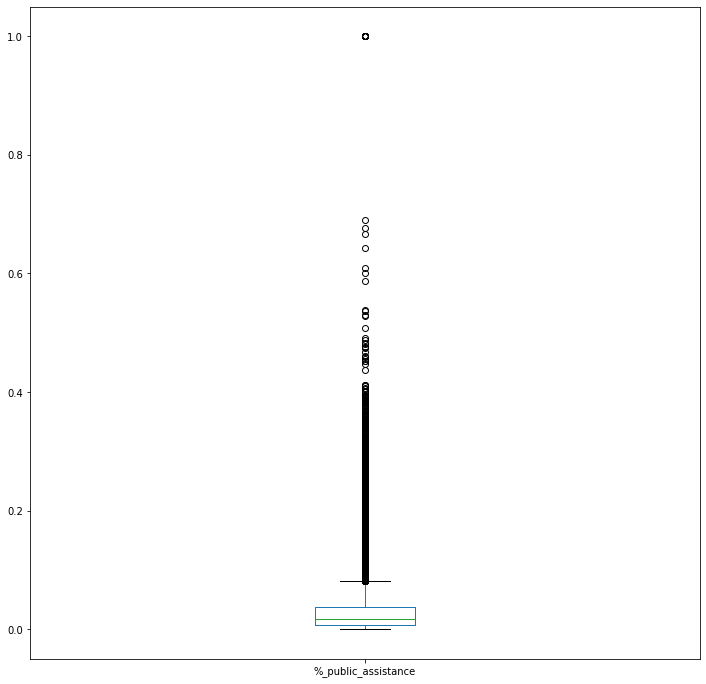

In [36]:
hcd['%_public_assistance'].plot.box(figsize=(12,12))

In [37]:
# group raw variables 

raw_census_vars = ['pop_den', '%_unemployed', '%_public_assistance', '%_poverty']

for feat in raw_census_vars:
    new_feat = feat + 'g'
    
    print(feat, 'percentiles:', np.nanpercentile(hcd[feat], [0, 25, 75, 100]))
    
    # separate into bottom 25%, middle 50%, and upper 25%
    hcd[new_feat] = pd.cut(hcd[feat], np.nanpercentile(hcd[feat], [0, 25, 75, 100]), labels=[0, 1, 2])
    hcd.drop(columns=feat, inplace=True)

hcd.head()

pop_den percentiles: [0.000000e+00 3.047285e+02 5.393903e+03 9.948081e+06]
%_unemployed percentiles: [0.         0.05080519 0.11345019 1.        ]
%_public_assistance percentiles: [0.         0.00682261 0.03685259 1.        ]
%_poverty percentiles: [0.         0.06302161 0.21111111 1.        ]


,Geo_FIPS,xobsyr_0,gran,pop_deng,%_unemployedg,%_public_assistanceg,%_povertyg
0,1003,2012,0,0,1,1,1
1,1015,2012,0,0,2,1,2
2,1043,2012,0,0,1,1,1
3,1049,2012,0,0,1,1,1
4,1051,2012,0,0,1,1,1


In [38]:
hcd.dtypes

Geo_FIPS                   int64
xobsyr_0                   int64
gran                       int64
pop_deng                category
%_unemployedg           category
%_public_assistanceg    category
%_povertyg              category
dtype: object

In [39]:
# pull out unique county/year combinations
fips_df = df[['block_FIPS', 'county_FIPS', 'xobsyr_0', 'Address', 'lat', 'lng']]
fips_df = fips_df.drop_duplicates(subset=['Address', 'xobsyr_0'])
fips_df['block_FIPS'] = fips_df['block_FIPS'].astype(str).str[:-2] # 54.099e15 -> 540990051001055.0 -> 540990051001055
fips_df['county_FIPS'] = fips_df['county_FIPS'].astype(str).str[:-2] # 54099.0 -> 54099
fips_df.head()

,block_FIPS,county_FIPS,xobsyr_0,Address,lat,lng
4,60730065001034,6073,2007,"3274 Rosecrans Street, San Diego, CA",32.7518382,-117.2041865
9,60730065001034,6073,2006,"3274 Rosecrans Street, San Diego, CA",32.7518382,-117.2041865
11,481410043124008,48141,2007,"1111 Barranca Dr., Suite 800, El Paso, TX",31.749293,-106.333557
24,60730065001034,6073,2008,"3274 Rosecrans Street, San Diego, CA",32.7518382,-117.2041865
34,481410043124008,48141,2008,"1111 Barranca Dr., Suite 800, El Paso, TX",31.749293,-106.333557


In [40]:
fips_df.shape

(388, 6)

In [41]:
for i,row in tqdm(fips_df.iterrows(), total=fips_df.shape[0]):
    if len(row['block_FIPS'].strip()) != 15:
        fips_df.at[i, 'block_FIPS'] = '0' + row['block_FIPS'].strip()
    if len(row['county_FIPS'].strip()) != 5:
        fips_df.at[i, 'county_FIPS'] = '0' + row['county_FIPS'].strip()
        
fips_df = fips_df.astype(str)
fips_df.head()

,block_FIPS,county_FIPS,xobsyr_0,Address,lat,lng
4,060730065001034,06073,2007,"3274 Rosecrans Street, San Diego, CA",32.7518382,-117.2041865
9,060730065001034,06073,2006,"3274 Rosecrans Street, San Diego, CA",32.7518382,-117.2041865
11,481410043124008,48141,2007,"1111 Barranca Dr., Suite 800, El Paso, TX",31.749293,-106.333557
24,060730065001034,06073,2008,"3274 Rosecrans Street, San Diego, CA",32.7518382,-117.2041865
34,481410043124008,48141,2008,"1111 Barranca Dr., Suite 800, El Paso, TX",31.749293,-106.333557


In [42]:
fips_df = fips_df[fips_df.xobsyr_0 >= '2006']

fips_df['gran'] = np.nan
fips_df['pop_deng'] = np.nan
fips_df['%_unemployedg'] = np.nan
fips_df['%_public_assistanceg'] = np.nan
fips_df['%_povertyg'] = np.nan

fips_df.shape

(388, 11)

In [43]:
# merge with patient location data

print('Merging at census tract level...')
for i,row in tqdm(fips_df.iterrows(), total=fips_df.shape[0]):
    try:
        block_FIPS = row['block_FIPS']
        xobsyr_0 = row['xobsyr_0']
        hcd_df = hcd[hcd.xobsyr_0 == int(xobsyr_0)]
        hcd_df = hcd_df[hcd_df.gran == 0]
        for j,r in hcd_df.iterrows():
            #print(r['xobsyr_0'], '=>', xobsyr_0, block_FIPS, '=>', r['Geo_FIPS'])
            if block_FIPS.startswith(r['Geo_FIPS']): 
                
                fips_df.at[i, 'gran'] = 0
                fips_df.at[i, 'pop_deng'] = r['pop_deng']
                fips_df.at[i, '%_unemployedg'] = r['%_unemployedg']
                fips_df.at[i, '%_public_assistanceg'] = r['%_public_assistanceg']
                fips_df.at[i, '%_povertyg'] = r['%_povertyg']    
                break
    except Exception as e:
        print('Error with line ' + str(i), e)

fips_df.head()

Merging at census tract level...


Error with line 4 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 9 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 11 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 24 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 34 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 36 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 49 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 50 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 51 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 53 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 54 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 71 startswith first arg must 

Error with line 1326 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 1327 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 1337 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 1339 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 1340 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 1343 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 1345 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 1347 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 1349 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 1352 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 1355 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 1356 

Error with line 2307 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 2308 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 2319 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 2363 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 2383 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 2445 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 2467 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 2468 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 2493 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 2494 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 2505 startswith first arg must be str or a tuple of str, not numpy.int64
Error with line 2555 

,block_FIPS,county_FIPS,xobsyr_0,Address,lat,lng,gran,pop_deng,%_unemployedg,%_public_assistanceg,%_povertyg
4,060730065001034,06073,2007,"3274 Rosecrans Street, San Diego, CA",32.7518382,-117.2041865,NaN,NaN,NaN,NaN,NaN
9,060730065001034,06073,2006,"3274 Rosecrans Street, San Diego, CA",32.7518382,-117.2041865,NaN,NaN,NaN,NaN,NaN
11,481410043124008,48141,2007,"1111 Barranca Dr., Suite 800, El Paso, TX",31.749293,-106.333557,NaN,NaN,NaN,NaN,NaN
24,060730065001034,06073,2008,"3274 Rosecrans Street, San Diego, CA",32.7518382,-117.2041865,NaN,NaN,NaN,NaN,NaN
34,481410043124008,48141,2008,"1111 Barranca Dr., Suite 800, El Paso, TX",31.749293,-106.333557,NaN,NaN,NaN,NaN,NaN


In [44]:
fips_df.shape[0] - fips_df['gran'].isna().sum() # see how many rows have census data

0

In [45]:
print('Merging remaining with county level data...')
for i,row in tqdm(fips_df.iterrows(), total=fips_df.shape[0]):
    try:
        if pd.isna(row['gran']): # if not filled by block_FIPS
            #print('here!', row['gran'])
            county_FIPS = row['county_FIPS']
            xobsyr_0 = row['xobsyr_0']
            hcd_df = hcd[hcd.xobsyr_0 == int(xobsyr_0)]
            hcd_df = hcd_df[hcd_df.gran == 0]
            for j,r in hcd_df.iterrows():
                #print(county_FIPS, '=>', r['Geo_FIPS'])
                try:
                    if int(r['Geo_FIPS']) == int(county_FIPS): 
                        
                        fips_df.at[i, 'gran'] = 1
                        fips_df.at[i, 'pop_deng'] = r['pop_deng']
                        fips_df.at[i, '%_unemployedg'] = r['%_unemployedg']
                        fips_df.at[i, '%_public_assistanceg'] = r['%_public_assistanceg']
                        fips_df.at[i, '%_povertyg'] = r['%_povertyg']    
                        break
                except Exception as e:
                    print('Error comparing', r['Geo_FIPS'], 'with', county_FIPS)
    except Exception as e:
        print('Error with line ' + i, e)

Merging remaining with county level data...


In [46]:
fips_df.shape[0] - fips_df['gran'].isna().sum() # see how many addresses have census data

362

In [47]:
fips_df.isna().sum()

block_FIPS               0
county_FIPS              0
xobsyr_0                 0
Address                  0
lat                      0
lng                      0
gran                    26
pop_deng                26
%_unemployedg           26
%_public_assistanceg    26
%_povertyg              26
dtype: int64

In [48]:
def closest_point(point, points):
    """ Find closest point from a list of points. """
    return points[cdist([point], points).argmin()]

def match_value(df, col1, x, y, col2):
    """ Match value x from col1 row to value in col2. """
    df = df[df[col1] == x] # get rows of closest center
    df['year_dist'] = abs(df['xobsyr_0'] - y)
    val = df[col][df['year_dist'].idxmin()] # impute using row that is closest year-wise
    if col2 != 'gran':
        return val
    else:
        return val + 2 # adjust gran variable to reflect vars that have imputed values

In [49]:
df.isna().sum()

engage30          0
agyaddr           0
xobsyr_0          0
State             0
City              0
female_cd         0
unemplmt_cd       0
primsev_cd        0
prsatx_cd         0
TRIg_0_cd         0
TMIg_0_cd         0
SESg_0_cd         0
gvsg_cd           0
und15_cd          0
CWSg_0_cd         0
srprobg_cd        0
dldiag_cd         0
dssg_0_cd         0
epsg_0_cd         0
adhdg_0_cd        0
cdsg_0_cd         0
suicprbs_0_cd     0
cjsig_0_cd        0
lrig_0_cd         0
srig_0_cd         0
homeless_0_cd     0
S6_cd             0
gcsg_0_cd         0
ncar_cd           0
SFSg_0_cd         0
B2a_0g            0
Raceg4_cd_gr_1    0
Raceg4_cd_gr_2    0
Raceg4_cd_gr_3    0
Raceg4_cd_gr_4    0
Address           0
lat               0
lng               0
state_name        0
county_FIPS       0
block_FIPS        0
dtype: int64

In [50]:
# impute remaining null census features with that of the closest center

fips_df['xobsyr_0'] = fips_df['xobsyr_0'].astype(int)

df1 = fips_df.dropna()
df2 = fips_df[fips_df.isnull().any(1)]

df1['point'] = [(x, y) for x,y in zip(df1['lat'], df1['lng'])]
df2['point'] = [(x, y) for x,y in zip(df2['lat'], df2['lng'])]

df2['closest'] = [closest_point(x, list(df1['point'])) for x in df2['point']]

cols_to_use = ['gran','pop_deng','%_unemployedg','%_public_assistanceg','%_povertyg']

for col in cols_to_use:
    df2[col] = [match_value(df1, 'point', x, y, col) for x,y in zip(df2['closest'], df2['xobsyr_0'])]

fips_df = pd.concat([df1, df2])
fips_df.shape

<ipython-input-50-8f3516cb8c95>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['point'] = [(x, y) for x,y in zip(df1['lat'], df1['lng'])]
<ipython-input-50-8f3516cb8c95>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['point'] = [(x, y) for x,y in zip(df2['lat'], df2['lng'])]
<ipython-input-50-8f3516cb8c95>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

(388, 13)

In [51]:
fips_df['xobsyr_0'] = fips_df['xobsyr_0'].astype(int)
df = pd.merge(df, fips_df, on=['Address', 'xobsyr_0'], how='left', suffixes=('', 'DUPLICATE'))
df = df[df.columns.drop(list(df.filter(regex='DUPLICATE')))] # drop duplicate columns from the merge
df.head()

,engage30,agyaddr,xobsyr_0,State,City,female_cd,unemplmt_cd,primsev_cd,prsatx_cd,TRIg_0_cd,TMIg_0_cd,SESg_0_cd,gvsg_cd,und15_cd,CWSg_0_cd,srprobg_cd,dldiag_cd,dssg_0_cd,epsg_0_cd,adhdg_0_cd,cdsg_0_cd,suicprbs_0_cd,cjsig_0_cd,lrig_0_cd,srig_0_cd,homeless_0_cd,S6_cd,gcsg_0_cd,ncar_cd,SFSg_0_cd,B2a_0g,Raceg4_cd_gr_1,Raceg4_cd_gr_2,Raceg4_cd_gr_3,Raceg4_cd_gr_4,Address,lat,lng,state_name,county_FIPS,block_FIPS,gran,pop_deng,%_unemployedg,%_public_assistanceg,%_povertyg,point,closest
0,0,3274 Rosecrans Street,2007,CA,San Diego,0,0,2,0,0,1,0,2,1,0,1,1,2,1,2,2,0,2,2,2,1,1,2,1,0,0,1,0,0,0,"3274 Rosecrans Street, San Diego, CA",32.7518382,-117.2041865,California,6073.0,6.073007e+13,1.0,2.0,1.0,1.0,1.0,"(32.7518382, -117.2041865)",NaN
1,0,3274 Rosecrans Street,2007,CA,San Diego,0,0,2,1,0,1,2,2,1,0,1,1,1,1,1,2,0,2,1,1,1,1,2,0,0,0,1,0,0,0,"3274 Rosecrans Street, San Diego, CA",32.7518382,-117.2041865,California,6073.0,6.073007e+13,1.0,2.0,1.0,1.0,1.0,"(32.7518382, -117.2041865)",NaN
2,0,3274 Rosecrans Street,2006,CA,San Diego,0,0,2,0,0,1,0,0,1,0,1,1,0,1,1,1,0,2,1,2,0,1,2,1,0,0,1,0,0,0,"3274 Rosecrans Street, San Diego, CA",32.7518382,-117.2041865,California,6073.0,6.073007e+13,1.0,2.0,0.0,1.0,1.0,"(32.7518382, -117.2041865)",NaN
3,1,"1111 Barranca Dr., Suite 800",2007,TX,El Paso,0,0,2,0,1,0,2,2,1,0,1,1,1,0,2,2,0,2,2,2,0,0,2,1,0,0,1,0,0,0,"1111 Barranca Dr., Suite 800, El Paso, TX",31.749293,-106.333557,Texas,48141.0,4.814100e+14,1.0,2.0,1.0,1.0,2.0,"(31.749293, -106.333557)",NaN
4,0,3274 Rosecrans Street,2006,CA,San Diego,0,0,2,0,1,1,1,2,1,0,1,1,1,1,2,2,0,2,2,2,0,1,2,1,0,0,1,0,0,0,"3274 Rosecrans Street, San Diego, CA",32.7518382,-117.2041865,California,6073.0,6.073007e+13,1.0,2.0,0.0,1.0,1.0,"(32.7518382, -117.2041865)",NaN


In [52]:
cols_to_drop = ['agyaddr','xobsyr_0','State','City','Address','lat','lng','state_name','county_FIPS','block_FIPS',
                'gran','point','closest']
df.drop(columns=cols_to_drop, inplace=True)

In [53]:
df.isna().sum() # see how much missing data remains

engage30                0
female_cd               0
unemplmt_cd             0
primsev_cd              0
prsatx_cd               0
TRIg_0_cd               0
TMIg_0_cd               0
SESg_0_cd               0
gvsg_cd                 0
und15_cd                0
CWSg_0_cd               0
srprobg_cd              0
dldiag_cd               0
dssg_0_cd               0
epsg_0_cd               0
adhdg_0_cd              0
cdsg_0_cd               0
suicprbs_0_cd           0
cjsig_0_cd              0
lrig_0_cd               0
srig_0_cd               0
homeless_0_cd           0
S6_cd                   0
gcsg_0_cd               0
ncar_cd                 0
SFSg_0_cd               0
B2a_0g                  0
Raceg4_cd_gr_1          0
Raceg4_cd_gr_2          0
Raceg4_cd_gr_3          0
Raceg4_cd_gr_4          0
pop_deng                0
%_unemployedg           0
%_public_assistanceg    0
%_povertyg              0
dtype: int64

## Split into opioids and stimulants datasets

In [54]:
opioids_mask = df['primsev_cd'] == 5
opioids = df[opioids_mask]
opioids = opioids.drop(columns=['primsev_cd'])

amphetamines_mask = df['primsev_cd'] == 2
cocaine_mask = df['primsev_cd'] == 4
stimulants = df[amphetamines_mask | cocaine_mask]
stimulants = stimulants.drop(columns=['primsev_cd'])

print('Opioids:', opioids.shape)
print('Stimulants:', stimulants.shape)

Opioids: (865, 34)
Stimulants: (3328, 34)


In [55]:
df.to_csv("data_cleaned.csv")
opioids.to_csv("opioids.csv")
stimulants.to_csv("stimulants.csv")

In [56]:
total_seconds = int(time.time() - start_time)
hours = total_seconds // (60 * 60)
minutes = (total_seconds - hours*60) // 60
seconds = (total_seconds - hours*60) % 60
print("--- " + str(minutes) + " minutes " + str(seconds) + " seconds ---")

--- 1 minutes 17 seconds ---
